Generative Adverserial Net

In [ ]:
# example of training the discriminator model on real and random mnist images
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
 model = Sequential()
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Flatten())
 model.add(Dense(1, activation='sigmoid'))
# compile model
 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model

In [ ]:
# load and prepare mnist training images
def load_real_samples():
# load mnist dataset
 (trainX, _), (_, _) = load_data()
# expand to 3d, e.g. add channels dimension
 X = expand_dims(trainX, axis=-1)
 # convert from unsigned ints to floats
 X = X.astype('float32')
# scale from [0,255] to [0,1]
 X = X / 255.0
 return X

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
# choose random instances
 ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 # generate 'real' class labels (1)
 y = ones((n_samples, 1))
 return X, y

In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
# generate uniform random numbers in [0,1]
 X = rand(28 * 28 * n_samples)
# reshape into a batch of grayscale images
 X = X.reshape((n_samples, 28, 28, 1))
# generate 'fake' class labels (0)
 y = zeros((n_samples, 1))
 return X, y

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
 half_batch = int(n_batch / 2)
# manually enumerate epochs
 for i in range(n_iter):
# get randomly selected 'real' samples
  X_real, y_real = generate_real_samples(dataset, half_batch)
# update discriminator on real samples
  _, real_acc = model.train_on_batch(X_real, y_real)
# generate 'fake' examples
  X_fake, y_fake = generate_fake_samples(half_batch)
# update discriminator on fake samples
  _, fake_acc = model.train_on_batch(X_fake, y_fake)
# summarize performance
  print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=36% fake=88%
>2 real=62% fake=98%
>3 real=77% fake=99%
>4 real=95% fake=100%
>5 real=98% fake=100%
>6 real=99% fake=100%
>7 real=100% fake=100%
>8 real=100% fake=100%
>9 real=100% fake=100%
>10 real=100% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=100% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
>21 real=100% fake=100%
>22 real=100% fake=100%
>23 real=100% fake=100%
>24 real=100% fake=100%
>25 real=100% fake=100%
>26 real=100% fake=100%
>27 real=100% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%
>31 real=100% fake=100%
>32 real=100% fake=100%
>33 real=100% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=100% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=1

**Task:**
1. Visualise the synthetic image

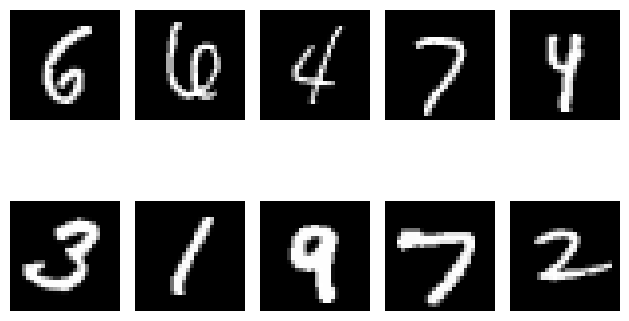

In [ ]:
import matplotlib.pyplot as plt

def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = rand(28 * 28 * n_samples)
    # reshape into a batch of grayscale images
    X = X.reshape((n_samples, 28, 28, 1))
    # generate 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

# Generate synthetic images
n_samples = 10
X_fake, _ = generate_real_samples(dataset,n_samples)

# Plot the synthetic images
for i in range(n_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_fake[i, :, :, 0], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


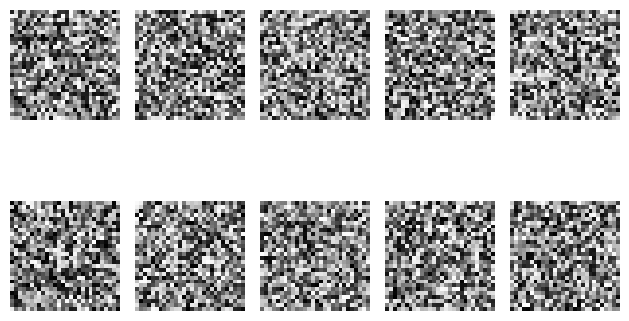

In [ ]:
import matplotlib.pyplot as plt

def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = rand(28 * 28 * n_samples)
    # reshape into a batch of grayscale images
    X = X.reshape((n_samples, 28, 28, 1))
    # generate 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y

# Generate synthetic images
n_samples = 10
X_fake, _ = generate_fake_samples(n_samples)

# Plot the synthetic images
for i in range(n_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_fake[i, :, :, 0], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

2. Compare the output for 20 epochs and 30 epochs

In [ ]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256, n_epochs=20):
    half_batch = int(n_batch / 2)
    
    # Manually enumerate epochs
    for i in range(n_epochs):
        # Get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        
        # Update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)
        
        # Generate 'fake' examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        
        # Update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        
        # Summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))


# Define the discriminator model
model = define_discriminator()

# Load image data
dataset = load_real_samples()

# Fit the model for 20 epochs
train_discriminator(model, dataset, n_epochs=20)

>1 real=73% fake=14%
>2 real=80% fake=26%
>3 real=81% fake=44%
>4 real=80% fake=64%
>5 real=84% fake=82%
>6 real=85% fake=96%
>7 real=83% fake=97%
>8 real=82% fake=99%
>9 real=84% fake=100%
>10 real=84% fake=100%
>11 real=88% fake=100%
>12 real=84% fake=100%
>13 real=81% fake=100%
>14 real=83% fake=100%
>15 real=80% fake=100%
>16 real=83% fake=100%
>17 real=87% fake=100%
>18 real=87% fake=100%
>19 real=85% fake=100%
>20 real=86% fake=100%


In [ ]:
# Fit the model for 30 epochs
train_discriminator(model, dataset, n_epochs=30)

>1 real=87% fake=100%
>2 real=93% fake=100%
>3 real=96% fake=100%
>4 real=87% fake=100%
>5 real=95% fake=100%
>6 real=95% fake=100%
>7 real=98% fake=100%
>8 real=98% fake=100%
>9 real=97% fake=100%
>10 real=96% fake=100%
>11 real=100% fake=100%
>12 real=100% fake=100%
>13 real=100% fake=100%
>14 real=100% fake=100%
>15 real=100% fake=100%
>16 real=100% fake=100%
>17 real=100% fake=100%
>18 real=99% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
>21 real=100% fake=100%
>22 real=100% fake=100%
>23 real=100% fake=100%
>24 real=100% fake=100%
>25 real=100% fake=100%
>26 real=100% fake=100%
>27 real=100% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%


3.Use the Final Generator Model to Generate Images with around (i) 25 (ii) 10 (iii) 50 latent space sample points and compare the results

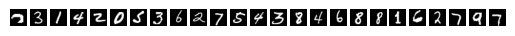

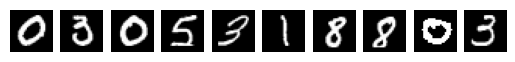

In [ ]:
import numpy as np
from keras.layers import Reshape
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Define the generator model
def define_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128 * 7 * 7, input_dim=latent_dim))
    model.add(Reshape((7, 7, 128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the latent dimension
latent_dim = 100

# Define the generator model
generator = define_generator(latent_dim)

# Load image data
(_, _), (_, _) = mnist.load_data()

# Generate images with different numbers of latent space sample points
n_samples_list = [25, 10, 50]

for n_samples in n_samples_list:
    X_fake, _ = generate_real_samples(dataset, n_samples)
    
    # Rescale generated images to range [0, 1]
    X_fake = (X_fake + 1) / 2.0
    
    # Display the generated images
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X_fake[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 146ms/step


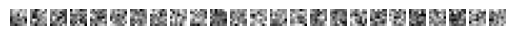

1/1 [==============================] - 0s 26ms/step


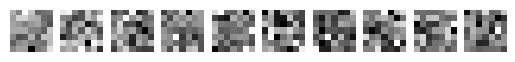

2/2 [==============================] - 0s 10ms/step


In [ ]:
import numpy as np
from keras.layers import Reshape
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Define the generator model
def define_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128 * 7 * 7, input_dim=latent_dim))
    model.add(Reshape((7, 7, 128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Load and prepare MNIST training images
def load_real_samples():
    (trainX, _), (_, _) = mnist.load_data()
    X = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32')
    X = (X - 127.5) / 127.5
    return X

# Generate fake samples with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples).reshape((n_samples, latent_dim))
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

# Define the latent dimension
latent_dim = 100

# Define the generator model
generator = define_generator(latent_dim)

# Load image data
dataset = load_real_samples()

# Generate images with different numbers of latent space sample points
n_samples_list = [25, 10, 50]

for n_samples in n_samples_list:
    X_fake, _ = generate_fake_samples(generator, latent_dim, n_samples)
    
    # Rescale generated images to range [0, 1]
    X_fake = (X_fake + 1) / 2.0
    
    # Display the generated images
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X_fake[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()


4. Change the activation and discuss the reflection on result

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
 model = Sequential()
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
 model.add(LeakyReLU(alpha=0.2))
 model.add(Dropout(0.4))
 model.add(Flatten())
 model.add(Dense(1, activation='tanh'))
# compile model
 opt = Adam(lr=0.0002, beta_1=0.5)
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 return model

In [ ]:
# load and prepare mnist training images
def load_real_samples():
# load mnist dataset
 (trainX, _), (_, _) = load_data()
# expand to 3d, e.g. add channels dimension
 X = expand_dims(trainX, axis=-1)
 # convert from unsigned ints to floats
 X = X.astype('float32')
# scale from [0,255] to [0,1]
 X = X / 255.0
 return X

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
# choose random instances
 ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 # generate 'real' class labels (1)
 y = ones((n_samples, 1))
 return X, y

In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
# generate uniform random numbers in [0,1]
 X = rand(28 * 28 * n_samples)
# reshape into a batch of grayscale images
 X = X.reshape((n_samples, 28, 28, 1))
# generate 'fake' class labels (0)
 y = zeros((n_samples, 1))
 return X, y

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
 half_batch = int(n_batch / 2)
# manually enumerate epochs
 for i in range(n_iter):
# get randomly selected 'real' samples
  X_real, y_real = generate_real_samples(dataset, half_batch)
# update discriminator on real samples
  _, real_acc = model.train_on_batch(X_real, y_real)
# generate 'fake' examples
  X_fake, y_fake = generate_fake_samples(half_batch)
# update discriminator on fake samples
  _, fake_acc = model.train_on_batch(X_fake, y_fake)
# summarize performance
  print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=0% fake=100%
>2 real=0% fake=100%
>3 real=0% fake=100%
>4 real=0% fake=100%
>5 real=0% fake=100%
>6 real=0% fake=100%
>7 real=0% fake=100%
>8 real=0% fake=100%
>9 real=0% fake=100%
>10 real=0% fake=100%
>11 real=0% fake=100%
>12 real=0% fake=100%
>13 real=0% fake=100%
>14 real=0% fake=100%
>15 real=0% fake=100%
>16 real=0% fake=100%
>17 real=0% fake=100%
>18 real=0% fake=100%
>19 real=0% fake=100%
>20 real=0% fake=100%
>21 real=0% fake=100%
>22 real=0% fake=100%
>23 real=0% fake=100%
>24 real=0% fake=100%
>25 real=0% fake=100%
>26 real=0% fake=100%
>27 real=0% fake=100%
>28 real=0% fake=100%
>29 real=0% fake=100%
>30 real=0% fake=100%
>31 real=0% fake=99%
>32 real=0% fake=100%
>33 real=0% fake=100%
>34 real=0% fake=100%
>35 real=0% fake=100%
>36 real=0% fake=100%
>37 real=0% fake=100%
>38 real=0% fake=100%
>39 real=0% fake=100%
>40 real=0% fake=100%
>41 real=0% fake=100%
>42 real=0% fake=100%
>43 real=2% fake=100%
>44 real=0% fake=100%
>45 real=0% fake=100%
>46 real=0% fake=100